In [1]:
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt
import datetime as dt
import geopandas as gpd

In [2]:
metadata = pd.DataFrame(columns=["name", "id", "alt"])
data = {}
zipfs = os.listdir("data2")
for zipf in zipfs:
    accs = zipfile.ZipFile("data2/"+zipf, "r")
    # Metadata
    f = accs.open("Metadaten.csv")
    meta = pd.read_csv(f, sep=";", encoding = "ISO-8859-1")
    f.close()
    entry = pd.DataFrame({"name":meta.Wert[meta.Metadatum=="Messstellenname"].to_list(),
                          "id":meta.Wert[meta.Metadatum=="Messstellennummer"].to_list(),
                          "alt":meta.Wert[meta.Metadatum=="Geländehöhe"].to_list()})
    metadata = metadata.append(entry)
    # Data
    f = accs.open(accs.filelist[2])
    tmp = pd.read_csv(f, sep=";", encoding = "ISO-8859-1", decimal=",")
    tmp["Datum"] = pd.to_datetime(tmp.Datum, format="%d.%m.%Y")
    tmp = tmp[["Datum", "Wasserstand [mNHN]"]]
    tmp.columns = ["date", "level"]
    tmp = tmp.set_index("date")
    data[int(entry.id.to_list()[0])] = tmp   
    f.close()
    accs.close()   

/tmp/ipykernel_19370/561923910.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append(entry)
/tmp/ipykernel_19370/561923910.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append(entry)
/tmp/ipykernel_19370/561923910.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append(entry)
/tmp/ipykernel_19370/561923910.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append(entry)
/tmp/ipykernel_19370/561923910.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

/tmp/ipykernel_19370/561923910.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append(entry)
/tmp/ipykernel_19370/561923910.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append(entry)
/tmp/ipykernel_19370/561923910.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append(entry)
/tmp/ipykernel_19370/561923910.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append(entry)
/tmp/ipykernel_19370/561923910.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

In [3]:
metadata["id"] = metadata.id.astype("int")

In [4]:
locs = pd.read_csv("locs.csv", sep=";", keep_default_na=False)
locs = gpd.GeoDataFrame(locs, geometry=gpd.points_from_xy(locs.lon, locs.lat), crs="EPSG:4326")
locs = locs.set_index("id")
locs["diff"] = 0.
locs

,name,stock,lat,lon,select,geometry,diff
id,,,,,,,
35432326,"Eiche, Ehrenpfortenberg",MP,52.409555,12.983906,1,POINT (12.98391 52.40955),0.0
35442254,"Potsdam, Drachenhaus",,52.404405,13.024878,1,POINT (13.02488 52.40440),0.0
35432600,"Golm, ca. 1 km nördlich",,52.417704,12.968078,1,POINT (12.96808 52.41770),0.0
35442256,"Potsdam, Orangerie",,52.406874,13.028701,1,POINT (13.02870 52.40687),0.0
35442250,"Bornstedt, Eichenallee",OP,52.408920,13.027767,1,POINT (13.02777 52.40892),0.0
...,...,...,...,...,...,...,...
35442335,"Fahrland,ca.500 m südwestl.Gut",,52.461011,13.005771,1,POINT (13.00577 52.46101),0.0
35442123,"Seeburg, ca. 1.2 km südl.",,52.495665,13.123412,1,POINT (13.12341 52.49567),0.0
36441987,"Pdm.-Bbg., Dianapark",OP,52.388155,13.122832,1,POINT (13.12283 52.38815),0.0


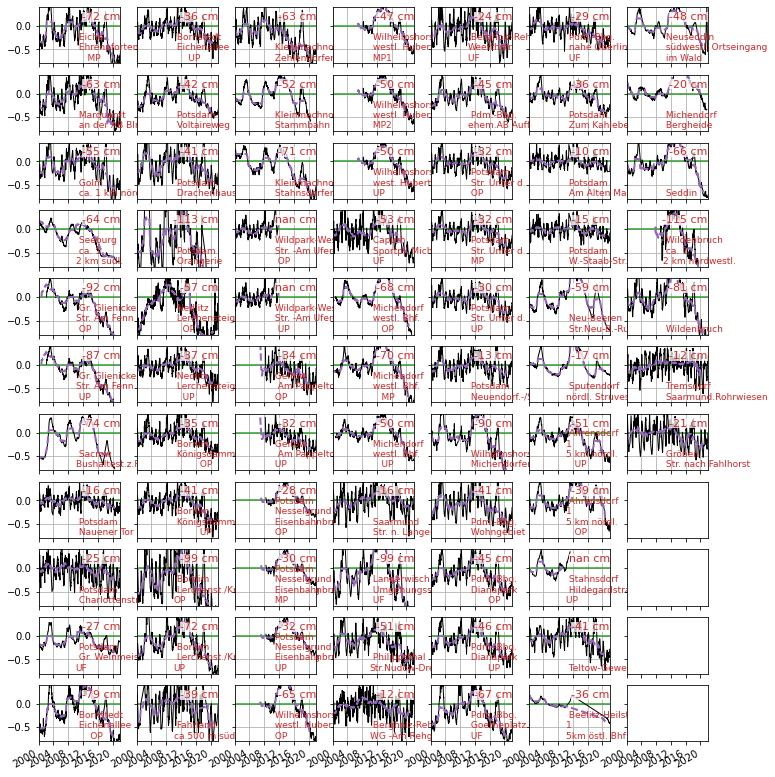

In [5]:
fig, ax = plt.subplots(11,7, figsize=(12,15), sharex=True, sharey=True)
ax = ax.ravel(order="F")
keys= list(data.keys())
keys.sort()
for i, key in enumerate(keys):
    plt.sca(ax[i])
    avglevel= data[key].loc["2002-01-01":"2012-01-01","level"].mean()
    plt.axhline(y=0, color="tab:green")
    ax[i].plot(data[key].index, data[key].level-avglevel, lw=1, color="black")
    ax[i].plot(data[key].index-dt.timedelta(days=500), 
               data[key].rolling("1000d").median().level-avglevel, lw=2, ls="--", color="tab:purple")
#plt.xlim(dt.datetime(2020,1,1), pd.datetime.now())
    plt.ylim(-0.8,0.4)
    plt.grid()
    plt.xlim(dt.datetime(2000,1,1),dt.datetime(2022,2,1))
    title=""
    for item in metadata[metadata.id==key].name.to_list()[0].split(",")[1:]:
        title = title + item+"\n"
    title.strip()
    plt.text(dt.datetime(2010,1,1), -1, title, color="tab:red", fontsize=9,
             horizontalalignment="left", verticalalignment="bottom")
    curlevel= data[key].loc["2020-01-01":"2022-01-01","level"].mean()
    diff = (curlevel-avglevel)*100
    locs.loc[key,"diff"] = diff
    
    t = plt.text(dt.datetime(2022,1,1), 0.3, "%.0f cm" % diff,
             horizontalalignment="right", verticalalignment="top", color="tab:red", fontsize=11)
    t.set_bbox(dict(facecolor='white', alpha=0.75, edgecolor='None', pad=0))

fig.autofmt_xdate()
#plt.tight_layout()
plt.savefig("gw-potsdam.pdf", dpi=300)

In [6]:
water = gpd.read_file("geo/gewaesser.shp")
water = water.to_crs(epsg=25832)
build = gpd.read_file("geo/buildings.shp")
build = build.to_crs(epsg=25832)
gmd = gpd.read_file("geo/gemeinden.shp")

In [7]:
locs = locs.to_crs(epsg=25832)

In [8]:
left, right, bottom, top = locs.bounds.minx.min(), locs.bounds.maxx.max(), locs.bounds.miny.min(), locs.bounds.maxy.max()

In [9]:
import numpy as np

In [11]:
water[water.fclass=="wetland"]

,osm_id,code,fclass,name,geometry
136,4804272,8221,wetland,None,"POLYGON ((797981.259 5842717.920, 798030.533 5..."
137,4804273,8221,wetland,None,"POLYGON ((798081.897 5842481.877, 798086.097 5..."
139,4804275,8221,wetland,None,"POLYGON ((797995.905 5842851.313, 798046.088 5..."
140,4804276,8221,wetland,None,"POLYGON ((797952.024 5842889.268, 797991.210 5..."
182,5116913,8221,wetland,None,"POLYGON ((785286.065 5840477.528, 785355.601 5..."
...,...,...,...,...,...
7860,1026215172,8221,wetland,None,"POLYGON ((786822.743 5782942.469, 786828.020 5..."
7862,1026842091,8221,wetland,None,"POLYGON ((750655.274 5816595.305, 750658.305 5..."
7863,1026842093,8221,wetland,None,"POLYGON ((750807.602 5816281.879, 750833.201 5..."
7882,13804044,8221,wetland,None,"POLYGON ((743793.832 5778320.928, 743795.740 5..."


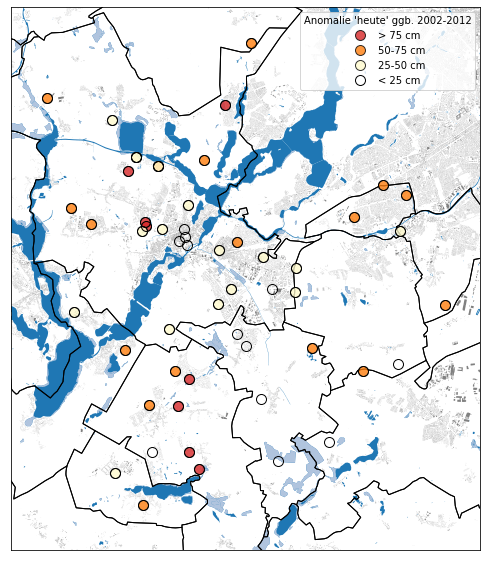

In [12]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
water.plot(ax=ax)
water[water.fclass=="wetland"].plot(ax=ax, edgecolor="None", facecolor="lightsteelblue")
build.plot(ax=ax, edgecolor="None", facecolor="grey")
gmd.plot(ax=ax, facecolor="None", edgecolor="black")
goodstock = np.array(locs.select==1) #np.in1d(locs.stock, ["", "OP", "UF"])
tmp = locs[(locs["diff"] <= -75) & goodstock]
plt.plot(tmp.geometry.x, tmp.geometry.y, "ko", mfc="tab:red", mec="black", ms=10, alpha=0.8, label="> 75 cm")
tmp = locs[(locs["diff"] > -75) & (locs["diff"] <= -50) & goodstock]
plt.plot(tmp.geometry.x, tmp.geometry.y, "ko", mfc="tab:orange", mec="black", ms=10, alpha=0.8, label="50-75 cm")
tmp = locs[(locs["diff"] > -50) & (locs["diff"] <= -25) & goodstock]
plt.plot(tmp.geometry.x, tmp.geometry.y, "ko", mfc="lemonchiffon", mec="black", ms=10, alpha=0.8, label="25-50 cm")
plt.plot(locs[goodstock].geometry.x, locs[goodstock].geometry.y, "ko", mfc="None", mec="black", ms=10, label="< 25 cm")
lg = plt.legend(loc="upper right", title = "Anomalie 'heute' ggb. 2002-2012")
#locs.plot("diff", ax=ax)
buf=2000
plt.xlim(left-buf, right+buf)
plt.ylim(bottom-buf, top+buf)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig("gw-spatial.pdf", dpi=300, bbox_inches="tight")

In [13]:
import folium
import numpy as np

In [14]:
from folium.plugins import FloatImage

In [15]:
goodstock = np.array(locs.select==1) #np.in1d(locs.stock, ["", "OP", "UF"])

## Grundwasser in Potsdam und Umgebung - Erholung in Sicht?

Die trockenen Jahre 2018 und 2019 haben dem Grundwasser in Brandenburg stark zugesetzt. Doch schon zuvor war teils ein deutlicher Abwärtstrend zu beobachten. Gibt es mittlerweile berechtige Hoffnung auf eine Erholung der Grundwasserstände? Die folgende Karte zeichnet ein ambivalentes Bild: Rund die Hälfte der Grundwasserpegel liegt noch "heute" (also im Mittel der Jahre 2020 bis 2022) mehr als 50 cm unter dem Mittelwert der Jahre 2002 bis 2012.

In [16]:
from folium import IFrame
import base64

In [17]:
keys= list(data.keys())
keys.sort()

resolution, width, height = 75, 4, 2

for i, key in enumerate(keys):
    
    fig, ax = plt.subplots(figsize=(width, height))
    startcurrent = dt.datetime(2020,1,1)
    endcurrent = dt.datetime(2022,1,1)
    avglevel= data[key].loc["2002-01-01":"2012-01-01","level"].mean()
    curlevel= data[key].loc[startcurrent:endcurrent,"level"].mean()
    diff = (curlevel-avglevel)*100
    plt.axhline(y=0, color="tab:green")
    #plt.plot([startcurrent, endcurrent], [diff, diff], color="tab:red")
    plt.plot(data[key].index, (data[key].level-avglevel)*100, lw=1, color="black")
#    plt.plot(data[key].index-dt.timedelta(days=500), 
#               data[key].rolling("1000d").median().level-avglevel, lw=2, ls="--", color="tab:purple")
#plt.xlim(dt.datetime(2020,1,1), pd.datetime.now())
    plt.grid()
    plt.xlim(dt.datetime(2010,1,1),dt.datetime(2022,2,1))
    title=""
#     for item in metadata[metadata.id==key].name.to_list()[0].split(",")[1:]:
#         title = title + item+"\n"
    titlefull = locs.loc[key,"name"]
    for item in titlefull.split(","):
        title = title + item.strip()+"\n"
    title.strip()

    locs.loc[key,"diff"] = diff
    miny = -90
    if diff<-90:
        miny = diff-20
    plt.ylim(miny,40)
    plt.ylabel("GW-Pegelstand (cm)")
    plt.text(dt.datetime(2010,4,1), miny, title, color="tab:red", fontsize=9,
             horizontalalignment="left", verticalalignment="bottom")
    mw=plt.text(dt.datetime(2010,4,1), 0+5, "Mittelwert (2002-2012)", color="tab:green", fontsize=9,
         horizontalalignment="left", verticalalignment="bottom")
    #mw=plt.text(dt.datetime(2022,1,1), diff+5, "2020-2022", color="tab:red", fontsize=9,
    #     horizontalalignment="right", verticalalignment="bottom")
    mw.set_bbox(dict(facecolor='white', alpha=0.75, edgecolor='None', pad=0))


    
    t = plt.text(dt.datetime(2022,1,1), 30, "%.0f cm" % diff,
             horizontalalignment="right", verticalalignment="top", color="tab:red", fontsize=11)
    t.set_bbox(dict(facecolor='white', alpha=0.75, edgecolor='None', pad=0))
    png = "img/%s.png" % key
    plt.savefig(png, dpi=resolution, bbox_inches="tight")

    fig.autofmt_xdate()
    plt.close()

In [18]:
def plot_pegel(tmp, m, color):
    
    for i in tmp.index:
        png = "img/%s.png" % i
        encoded = base64.b64encode(open(png, 'rb').read())
        html = '<img src="data:image/png;base64,{}">'.format
        #print(20*'-',encoded.decode('UTF-8'))
        iframe = IFrame(html(encoded.decode('UTF-8')), 
                        width=(width*resolution)+20, height=(height*resolution)+20)
        popup = folium.Popup(iframe, max_width=2650)

#        icon = folium.Icon(color="red", icon="ok")
#        marker = folium.Marker([52.398918177440855, 13.1], popup=popup, icon=icon)

        folium.CircleMarker(
            location=[tmp.loc[i,"lat"], tmp.loc[i,"lon"]],
            radius=8,
            popup=popup, #tmp.loc[i,"name"],
            color=color,
            fill=True,
            fill_color=color
        ).add_to(m)
    

In [19]:
np.sum((locs["diff"] < -50) & goodstock), np.sum(goodstock)

(25, 54)

In [37]:
# resolution, width, height = 75, 7, 3
# fig, ax = plt.subplots(figsize=(width, height))
# plt.plot([0,1], [0,1])
# plt.ylabel('Temp (°C)')
# png = 'tmp/temperatures.png'
# plt.savefig(png, dpi=resolution)

# encoded = base64.b64encode(open(png, 'rb').read())

# html = '<img src="data:image/png;base64,{}">'.format
# #print(20*'-',encoded.decode('UTF-8'))
# iframe = IFrame(html(encoded.decode()), width=(width*resolution)+20, height=(height*resolution)+20)
# popup = folium.Popup(iframe, max_width=2650)

# icon = folium.Icon(color="red", icon="ok")
# marker = folium.Marker([52.398918177440855, 13.1], popup=popup, icon=icon)


m = folium.Map(location=[52.375, 13.1], zoom_start=11,tiles="CartoDB Positron")#,
#              tiles='https://tiles.stadiamaps.com/tiles/stamen_terrain/{z}/{x}/{y}{r}.{ext}')#, 
#               attr='&copy; <a href="https://www.stadiamaps.com/" target="_blank">Stadia Maps</a> &copy; <a href="https://www.stamen.com/" target="_blank">Stamen Design</a> &copy; <a href="https://openmaptiles.org/" target="_blank">OpenMapTiles</a> &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors')
#folium.TileLayer('https://tiles.stadiamaps.com/tiles/stamen_terrain/{z}/{x}/{y}{r}.{ext}', attr='&copy; <a href="https://www.stadiamaps.com/" target="_blank">Stadia Maps</a> &copy; <a href="https://www.stamen.com/" target="_blank">Stamen Design</a> &copy; <a href="https://openmaptiles.org/" target="_blank">OpenMapTiles</a> &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',).add_to(m)
# other mapping code (e.g. lines, markers etc.)
#folium.LayerControl().add_to(m)

FloatImage('legend.png', bottom=59, left=78).add_to(m)

tmp = locs[(locs["diff"] <= -75) & goodstock]
plot_pegel(tmp, m, color="#cb4335")

tmp = locs[(locs["diff"] > -75) & (locs["diff"] <= -50) & goodstock]
plot_pegel(tmp, m, color="#eb984e")

tmp = locs[(locs["diff"] > -50) & (locs["diff"] <= -25) & goodstock]
plot_pegel(tmp, m, color="#f9e79f")

tmp = locs[(locs["diff"] > -25) & goodstock]
plot_pegel(tmp, m, color="#808b96")

#marker.add_to(m)

m

(Daten: [Auskunftsplattform Wasser, Land Brandenburg](https://apw.brandenburg.de/), Analyse & Darstellung: M. Heistermann, Uni Potsdam; die dargestellten Pegel sind eine willkürliche Teilmenge des Datenkollektivs des LfU Brandenburg aus der näheren Umgebung Potsdams) 

## Wasserbilanz

In [38]:
kl = pd.read_csv("dwd/produkt_klima_tag_18930101_20201231_03987.txt", sep=";")
kl["MESS_DATUM"] = pd.to_datetime(kl.MESS_DATUM, format="%Y%m%d")
kl = kl.set_index("MESS_DATUM")

kl2 = pd.read_csv("dwd/produkt_klima_tag_20200829_20220301_03987.txt", sep=";")
kl2["MESS_DATUM"] = pd.to_datetime(kl2.MESS_DATUM, format="%Y%m%d")
kl2 = kl2.set_index("MESS_DATUM")

kl = kl.append(kl2)

kl.columns = [item.strip() for item in kl.columns]
kl.columns = ['STATIONS_ID', 'QN_3', 'FX', 'U_2', 'QN_4', 'prec', 'RSKF', 'n_sun',
              'SHK_TAG', 'cover', 'dampf', 'P', 'T_mean', 'RH_mean', 'T_max', 'T_min', 'TGK', 'eor']

/tmp/ipykernel_19370/918657426.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kl = kl.append(kl2)


In [ ]:
from eto import ETo

In [ ]:
et = ETo()
kl.P = kl.P / 10
et.param_est(kl, freq="D", z_msl=50, lat=52.38165282450696, lon=13.06357318747036, TZ_lon=15)
kl["et"] = et.eto_fao()
kl["eth"] = et.eto_hargreaves()

In [ ]:
kl["bilanz"] = kl.prec-kl.et
kly = kl.resample("1a").sum()

In [ ]:
kly.loc[:"2021",["bilanz"]].plot()

In [ ]:
import numpy as np

In [ ]:
fig, ax = plt.subplots()
tmp = kly.loc["1995":"2021"]
plt.bar(tmp.index, np.array(tmp.bilanz), width=300)
#ax.xaxis_date()

In [ ]:
kl.loc["2000":"2021",["et"]].plot()

In [ ]:
kly.loc["1900":"2021",["et"]].plot()

In [ ]:
pet = pd.read_csv("/media/x/cosmicsense/git/crns-up/data/out/pet_daily.csv", sep=";")
pet["datetime"] = pd.to_datetime(pet.datetime)
pet = pet.set_index("datetime")
pety= pet.resample("1a").sum()

In [ ]:
fig, ax = plt.subplots()
kly.loc["1995":"2021",["eth"]].plot(ax=ax)
pety.loc[:"2021",["MQ001"]].plot(ax=ax)